## Project Title: Predicting Customer Churn and Analyzing Customer Segmentation in E-Commerce

In this project, machine learning techniques are used to address the challenges of customer churn prediction and customer segmentation in an e-commerce setting. Supervised learning techniques are applied to predict customer churn, while unsupervised learning methods are employed to discover meaningful customer segments. Additionally, deep learning models are integrated to improve prediction accuracy, showcasing the versatility of both traditional and advanced machine learning techniques. This project serves as a comprehensive demonstration of my ability to extract actionable insights from complex datasets and drive data-informed business strategies

## A. Problem Definition & Data Understanding

### 1. Problem Statement:

The goal is to analyze customer behavior in an e-commerce setting and provide solutions to two key business problems:
- Customer Churn Prediction (Supervised Learning – Classification Task):
Predict whether a customer will stop using the e-commerce platform in the near future (churn). Churn prediction is a crucial business task because retaining existing customers is often more cost-effective than acquiring new ones. By predicting customer churn, the business can take proactive measures to improve retention, such as offering targeted discounts or personalized marketing strategies.
- This is formulated as a binary classification task, where the target variable Churn takes on two values:
  - 1: The customer churned (i.e., stopped using the platform).
  - 0: The customer did not churn.
- Customer Segmentation (Unsupervised Learning Task):
  - In addition to predicting churn, the goal is to segment customers into distinct groups based on their behavior and demographics. Customer segmentation is essential for personalizing marketing strategies, tailoring product offerings, and understanding different types of customers (e.g., high spenders, infrequent buyers).
  - This task will use unsupervised learning techniques, particularly clustering algorithms (like K-Means), to identify patterns within the data without predefined labels. The business can use these insights to design more targeted marketing strategies or create customer loyalty programs for different segments.
- Deep Learning for Enhanced Churn Prediction:
  - To improve the accuracy of churn prediction, deep learning techniques (such as neural networks) will be applied. While traditional machine learning models like logistic regression or decision trees may offer good performance, deep learning can capture more complex patterns in the data, especially when dealing with non-linear relationships and high-dimensional datasets.
  - The deep learning model will be built using neural networks, and its performance will be compared with traditional machine learning algorithms to demonstrate the benefits of advanced modeling techniques
    

### 2. Load and read the dataset

In [67]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Owner\OneDrive\Desktop\Research_Data\ecommerce_customer_realistic_churn_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,CustomerID,Age,Gender,AnnualIncome,SpendingScore,Tenure,FrequencyOfPurchases,TotalSpent,IsActiveMember,Churn
0,1,41,Male,90233,24,7,2,4867.665215,1,0
1,2,40,Female,55537,61,4,22,2982.772962,0,0
2,3,25,Male,131293,61,8,17,4850.020947,0,0
3,4,64,Female,107576,98,5,36,3799.396794,0,1
4,5,54,Male,137522,28,7,14,6164.302828,0,0


### 3. Data Understanding:
#### a. Metadata: Understanding each feature in the dataset  
The dataset includes various customer attributes that are likely to influence churn and behavior patterns. 
Below are the key features that will be used:

- CustomerID: A unique identifier for each customer.
- Age: The age of the customer.
- Gender: The gender of the customer (Male/Female).
- AnnualIncome: The customer’s annual income in USD.
- SpendingScore: A score that represents the customer’s purchasing behavior (from 1-100).
- Tenure: The number of years the customer has been with the company.
- IsActiveMember: A binary variable that indicates whether the customer is an active member (1 for active, 0 for inactive).
- TotalSpent: The total amount of money the customer has spent on the platform.
- FrequencyOfPurchases: The number of times the customer has made a purchase in the last year.
- Churn: A binary target variable that indicates whether the customer has churned (1 for churned, 0 for retained).
- Understanding these features is critical for developing both the churn prediction model and the customer segmentation solution.

##### Key Insights and Importance:
##### Churn Prediction: 
The business needs to identify which features (e.g., tenure, total spending, or purchasing frequency) are the most important predictors of churn. This will help in understanding why customers are leaving and what can be done to retain them.
Customer Segmentation: Insights gained from unsupervised learning will allow the business to personalize customer experiences and target specific segments with appropriate marketing strategies, improving customer satisfaction and retention.

In [68]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   AnnualIncome          1000 non-null   int64  
 4   SpendingScore         1000 non-null   int64  
 5   Tenure                1000 non-null   int64  
 6   FrequencyOfPurchases  1000 non-null   int64  
 7   TotalSpent            1000 non-null   float64
 8   IsActiveMember        1000 non-null   int64  
 9   Churn                 1000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 78.2+ KB


### b.  Investigating missing values, outliers, and feature distributions

In [87]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Impute missing values with the mean (for numerical columns) or mode (for categorical columns)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['AnnualIncome'].fillna(df['AnnualIncome'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


# Verify that missing values are handled
print(df.isnull().sum())

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
SpendingScore           0
Tenure                  0
FrequencyOfPurchases    0
TotalSpent              0
IsActiveMember          0
Churn                   0
SpendingPerYear         0
dtype: int64
CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
SpendingScore           0
Tenure                  0
FrequencyOfPurchases    0
TotalSpent              0
IsActiveMember          0
Churn                   0
SpendingPerYear         0
dtype: int64


The dataset has now no Missing values 

### c.  Handling Outliers

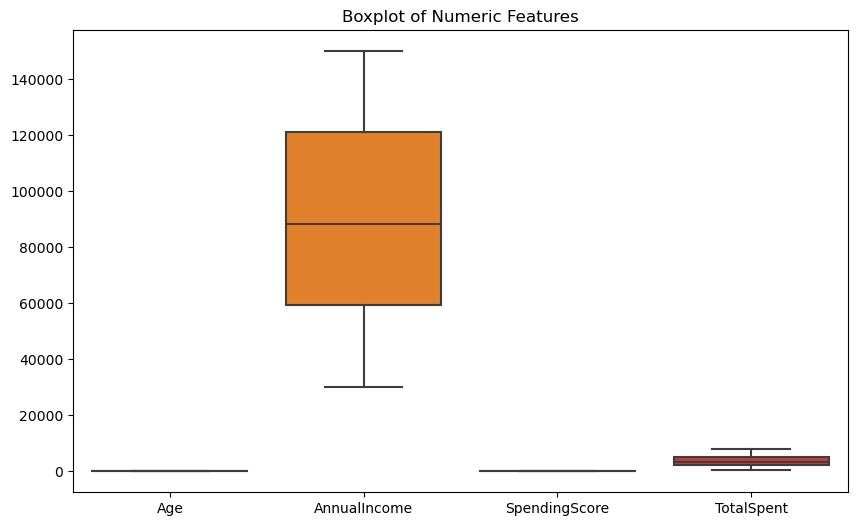

In [88]:
## Outliers can distort model predictions. Use boxplots to visualize outliers and decide whether to cap or remove them
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize potential outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'AnnualIncome', 'SpendingScore', 'TotalSpent']])
plt.title("Boxplot of Numeric Features")
plt.show()

# Option: Remove outliers based on thresholds (e.g., for TotalSpent and AnnualIncome)
# Example for capping: If values are beyond 99th percentile, cap them
q_high = df['TotalSpent'].quantile(0.99)
df['TotalSpent'] = df['TotalSpent'].apply(lambda x: q_high if x > q_high else x)

# Similarly, you can handle other columns like Age or AnnualIncome if needed


- Scaling Issue: The wide discrepancy in scale between AnnualIncome and the other features might lead to bias in model training, as models like Logistic Regression could give higher importance to features with larger ranges (in this case, AnnualIncome). This issue can be addressed by scaling the features using techniques like Min-Max Scaling or Standardization.
- Outliers: There don’t appear to be any significant outliers in AnnualIncome, as the whiskers cover the entire range without significant gaps. The other features are also tightly packed, which suggests limited variance in those variables.
- Imbalance in Variability: If features like SpendingScore and Age are important for predicting churn, their limited variance (as shown here) may reduce their predictive power. Investigating these features further might be necessary to understand their contribution.

### d. Normalization/Scaling of Features

Scaling numerical features is crucial for machine learning algorithms (like logistic regression or neural networks) that rely on distances between data points.

In [90]:
# Check for non-numeric values in the dataset
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Column '{column}' contains non-numeric data.")
        print(df[column].unique())



Column 'Gender' contains non-numeric data.
['Male' 'Female']


#### e. Transforming Categorical Variables

In [91]:

import pandas as pd

# Define the numeric columns where you expect numeric values
numeric_columns = ['Age', 'AnnualIncome', 'SpendingScore', 'TotalSpent', 'FrequencyOfPurchases']

# Check and remove rows with string values in numeric columns
for col in numeric_columns:
    # Remove rows where values are not numeric
    df = df[df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Convert the remaining values to numeric types (if they are still strings)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Verify that only numeric values remain
print(df[numeric_columns].dtypes)



Age                       int64
AnnualIncome              int64
SpendingScore             int64
TotalSpent              float64
FrequencyOfPurchases      int64
dtype: object


##### Saving the Cleaned Data

In [73]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = r'C:\Users\Owner\OneDrive\Desktop\Research_Data\ecommerce_customer_churn_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)


## B. Perform Exploratory Data Analysis (EDA)

### a.  Correlation Analysis and Visualization
We generate a heatmap to visualize correlations between features and identify relationships, especially focusing on Tenure and Churn.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   AnnualIncome          1000 non-null   int64  
 4   SpendingScore         1000 non-null   int64  
 5   Tenure                1000 non-null   int64  
 6   FrequencyOfPurchases  1000 non-null   int64  
 7   TotalSpent            1000 non-null   float64
 8   IsActiveMember        1000 non-null   int64  
 9   Churn                 1000 non-null   int64  
 10  SpendingPerYear       1000 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 93.8+ KB


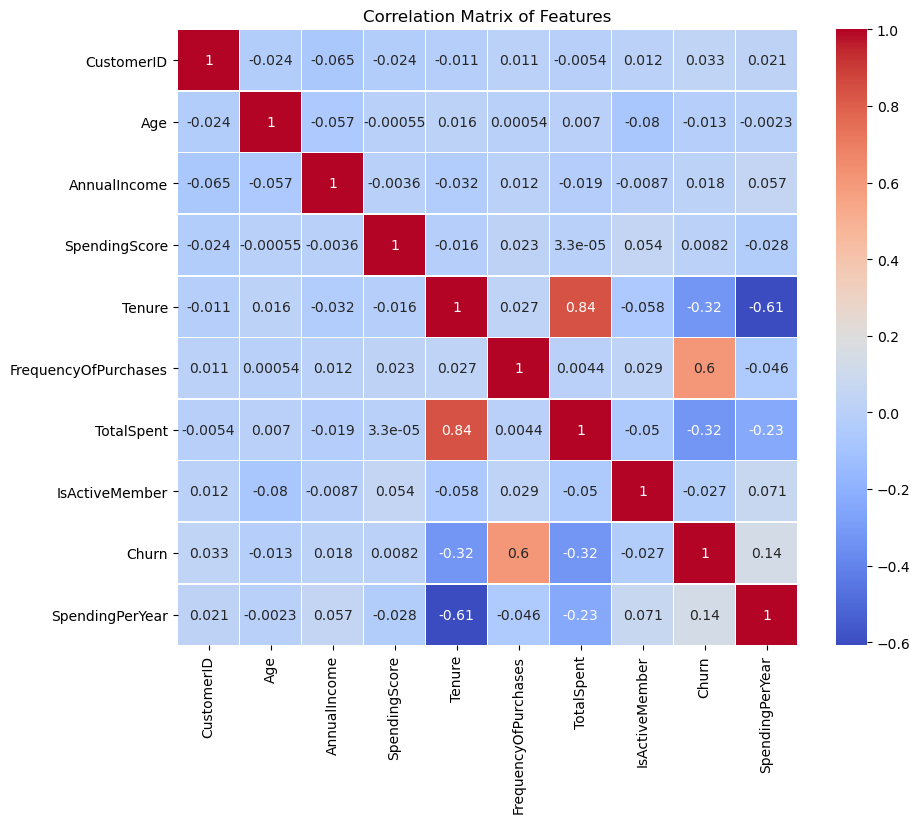

In [92]:
# Summary of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Visualize correlations with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

#### Key Insights from the Correlation Matrix:
- Tenure:
  - Negative correlation with Churn (-0.32): This suggests that customers with a longer tenure are less likely to churn, which aligns with typical business patterns where long-term customers are generally more loyal.
  - Strong positive correlation with TotalSpent (0.84): As expected, the longer a customer stays with the company, the more they tend to spend.

- FrequencyOfPurchases:
  - Moderate positive correlation with Churn (0.6): Customers who purchase frequently seem more likely to churn, which could indicate that these customers engage frequently but may leave after a short period.
  - Strong correlation with TotalSpent (0.6): Customers who make more purchases also tend to spend more.
- SpendingPerYear:
  - Moderate negative correlation with Tenure (-0.61): This suggests that newer customers tend to spend more annually, while long-term customers might spend less on average per year.
- IsActiveMember:
  - Weak negative correlation with Churn (-0.027): Being an active member doesn’t seem to have a strong influence on churn. This could indicate that being an "active" member in this context does not significantly affect a customer's likelihood of leaving.
- TotalSpent:
  - Negative correlation with Churn (-0.23): Customers who have spent more tend to have a lower likelihood of churning.
- Other Features:
AnnualIncome and SpendingScore show weak or no significant correlations with Churn, suggesting that these features might not be strong predictors of customer churn in this dataset.

#### b. Investigate Patterns Related to Churn
We now explore relationships between key features and Churn, such as how tenure, total spending, and frequency of purchases affect customer churn.


### Visualize total spending by churn

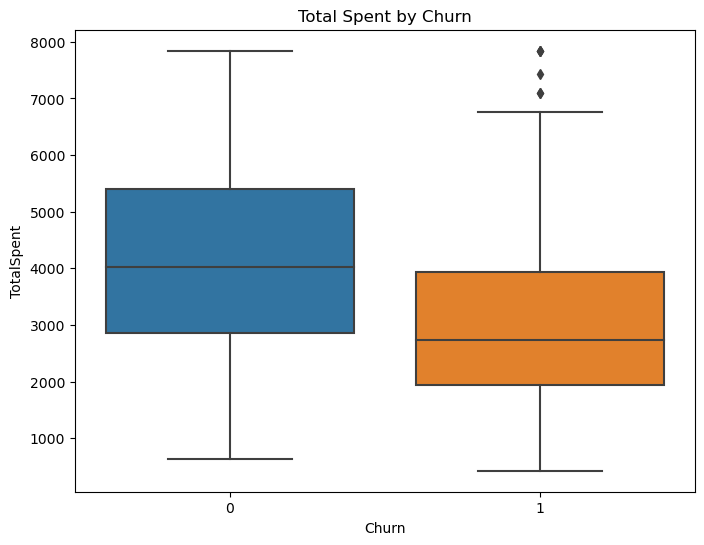

In [75]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalSpent', data=df)
plt.title('Total Spent by Churn')
plt.show()


#### Interpretation of Total Spent by Churn:
- Churn = 0 (Did Not Churn): Customers who did not churn have a wider range of total spending, with the median around $4000. The interquartile range (IQR) shows that most of these customers spend between $3000 and $5000. There are a few outliers with spending over $7000, indicating that some loyal customers tend to spend significantly more.
      
- Churn = 1 (Churned Customers): Churned customers have a lower median spending, around $3000. The IQR indicates that most churned customers spend between $2000 and $4000. There are fewer outliers compared to the non-churned group, but overall, churned customers tend to spend less than non-churned customers.
#### Key Insights:
- TotalSpent is a distinguishing feature between churned and non-churned customers.
- Higher spending seems to be associated with customers who remain, while lower spending is more common among churned customers.
- The median spending of non-churned customers is significantly higher than that of churned customers, which aligns with the assumption that customers who spend more are less likely to churn.
- Outliers: There are a few customers who did not churn but spent significantly higher amounts than the average. These high-spending customers are likely valuable to the business and may represent loyal, high-value customers.
#### Conclusion:
Total Spent appears to be a strong predictor of churn. Customers who spend more tend to stay with the company, while those who spend less are more likely to churn.

#### Visualize the relationship between tenure and churn

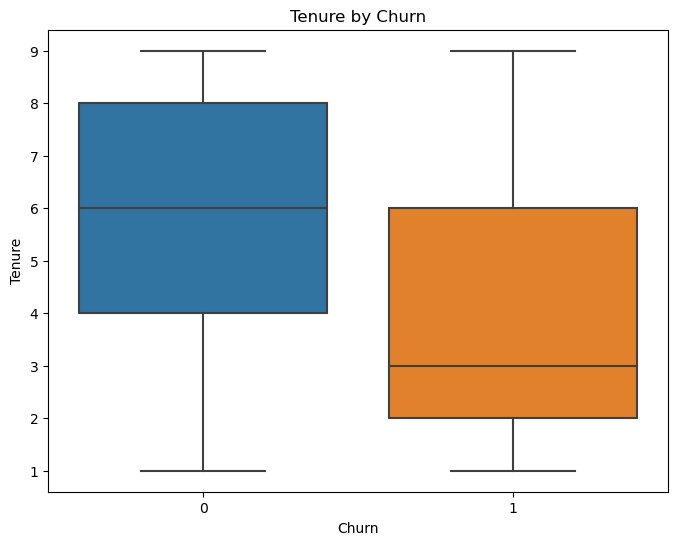

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure by Churn')
plt.show()

#### Interpretation of Tenure by Churn:
- Churn = 0 (Did Not Churn):
Customers who did not churn have a median tenure of about 6 years.
The interquartile range (IQR) shows that most of these customers have been with the company for 4 to 8 years, indicating that long-term customers are less likely to churn.
The minimum tenure for non-churned customers is around 1 year, and the maximum is 9 years, with no outliers observed.

- Churn = 1 (Churned Customers): Customers who churned have a median tenure of about 3 years, which is significantly lower than the non-churned group.
The IQR indicates that most churned customers have been with the company for 2 to 5 years, with the majority being relatively newer customers.
The minimum tenure for churned customers is about 1 year, and the maximum is around 9 years, showing some overlap with non-churned customers, but the distribution is notably shifted toward shorter tenures.

#### Key Insights:
Longer tenure is associated with lower churn rates. Customers with higher tenure (around 6+ years) are less likely to churn, while customers with shorter tenure (less than 4 years) are more likely to churn.
Tenure is a strong predictor of churn, with clear differences between the churned and non-churned groups.
#### Conclusion:
Tenure is a key factor influencing churn behavior, with newer customers being at a higher risk of churning. The longer a customer stays with the company, the less likely they are to churn.

### b. Investigate Strong Correlations with Tenure

Text(0, 0.5, 'Total Spent (USD)')

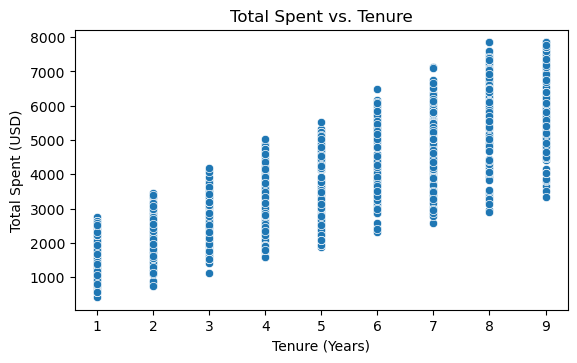

In [93]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot 1: Tenure vs. TotalSpent
plt.subplot(2, 2, 1)
sns.scatterplot(x='Tenure', y='TotalSpent', data=df)
plt.title('Total Spent vs. Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Total Spent (USD)')

The "Total Spent vs. Tenure" plot shows a clear positive correlation between how long a customer has been with the company (Tenure) and how much they have spent in total (TotalSpent). 

#### Key Observations:
- Increasing Total Spent with Higher Tenure: As tenure increases, the total amount spent by customers steadily rises. Customers who have been with the company for 8 or 9 years have spent significantly more than those with only 1 or 2 years of tenure.
This matches the strong correlation (0.84) we saw in the correlation matrix between Tenure and TotalSpent.

#### Consistent Growth in Spending:
- The growth in spending seems to follow a relatively linear trend. Every year that a customer stays with the company, their total spending tends to increase by a noticeable amount.
Spending Concentration:
- The plot also shows that customers within the same tenure year tend to have similar spending patterns, with a slight spread in values, which could reflect different purchase behaviors or product preferences.
#### Implications:
- Customer Retention: This visualization confirms that longer-tenured customers are more valuable in terms of total spending. Implementing strategies to increase customer tenure (e.g., loyalty programs) could significantly boost long-term revenue.
- Predictive Modeling: Tenure can be a strong predictor of customer lifetime value (CLV) and churn, as customers who spend more tend to remain with the company longer.

####  Tenure vs. SpendingPerYear

Text(0, 0.5, 'Spending Per Year (USD)')

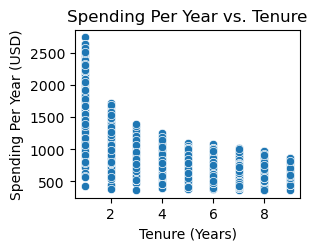

In [94]:
plt.subplot(2, 2, 2)
sns.scatterplot(x='Tenure', y='SpendingPerYear', data=df)
plt.title('Spending Per Year vs. Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Spending Per Year (USD)')

#### Key Observations:
- Higher Spending for Newer Customers: Customers with a shorter tenure (1-2 years) tend to have much higher Spending Per Year, with some spending over $2000 annually. This suggests that newer customers may be making large purchases early on, potentially during initial engagement periods or promotions.
  
- Declining Spending with Higher Tenure:  As tenure increases, Spending Per Year decreases steadily. By the time a customer reaches 5 or more years, their annual spending is generally below $1000, with a concentration around $500-800 per year.
- This trend aligns with the negative correlation (-0.61) between SpendingPerYear and Tenure observed in the correlation matrix.
Plateau in Spending:

- For customers with 6-8 years of tenure, spending stabilizes around the $500-1000 range, indicating that long-term customers maintain a steady but lower level of annual spending compared to newer customers.

#### Implications:
- Initial High Engagement: New customers tend to spend more when they first engage with the company, possibly taking advantage of promotions or discounts.
- Retention Strategy: While total spending increases with tenure (as shown in the previous plot), Spending Per Year decreases over time. 
To maintain engagement with long-tenured customers, the company could introduce loyalty programs or special promotions to encourage more frequent purchases.
- Customer Segmentation: Customers with different tenures display different spending behaviors. Segmenting customers by tenure could help the company tailor its marketing strategies to meet the needs of both new and long-tenured customers.

#### Tenure vs. FrequencyOfPurchases

Text(0, 0.5, 'Number of Purchases')

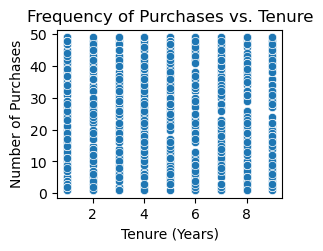

In [95]:
plt.subplot(2, 2, 3)
sns.scatterplot(x='Tenure', y='FrequencyOfPurchases', data=df)
plt.title('Frequency of Purchases vs. Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Purchases')

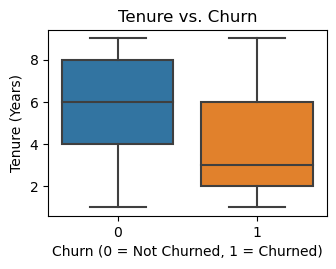

In [96]:
# Plot 4: Tenure vs. Churn (Boxplot)
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Tenure (Years)')

# Adjust layout for better display
plt.tight_layout()
plt.show()

The analysis reveals that Tenure is a strong predictor of customer behavior, with longer-tenured customers tending to spend more overall, though their Spending Per Year decreases as tenure increases. Customers with shorter tenures (around 2-4 years) are more likely to churn, while those with longer tenures (5+ years) are less likely to leave. Interestingly, Frequency of Purchases does not show a clear relationship with tenure, suggesting that other factors may influence purchasing behavior. These findings highlight the importance of focusing retention efforts on newer customers to increase their tenure and overall spending, while also exploring additional factors that may drive purchase frequency.

### c. Feature Engineering Suggestions for the Churn Prediction Model
Based on the analysis of Tenure, TotalSpent, Frequency of Purchases, and Spending Per Year, we can create new features that may improve the model's predictive power.

In [104]:
import pandas as pd

# Load the dataset from your local path
file_path = r'C:\Users\Owner\OneDrive\Desktop\Research_Data\ecommerce_customer_realistic_churn_dataset.csv'
new_df = pd.read_csv(file_path)

# Create new feature: Spending per year (TotalSpent / Tenure)
new_df['SpendingPerYear'] = new_df['TotalSpent'] / new_df['Tenure']

# Customer Lifetime Value (CLV): Total amount a customer is expected to spend over their lifetime
new_df['CLV'] = new_df['Tenure'] * new_df['SpendingPerYear']

# Average Spend Per Purchase: average amount a customer spends per purchase
new_df['AvgSpendPerPurchase'] = new_df['TotalSpent'] / new_df['FrequencyOfPurchases']

# Spending Growth Rate: change in spending over time
new_df['SpendingGrowthRate'] = new_df['SpendingPerYear'] / new_df['Tenure']

# Loyalty Indicator: binary feature indicating customer loyalty
new_df['LoyaltyIndicator'] = ((new_df['IsActiveMember'] == 1) & (new_df['Tenure'] > 5)).astype(int)

# High-Spender Indicator: Flag customers who are high spenders
new_df['HighSpender'] = (new_df['TotalSpent'] > 5000).astype(int)

# Display the first few rows of the new dataframe
new_df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,Tenure,FrequencyOfPurchases,TotalSpent,IsActiveMember,Churn,SpendingPerYear,CLV,AvgSpendPerPurchase,SpendingGrowthRate,LoyaltyIndicator,HighSpender
0,1,41,Male,90233,24,7,2,4867.665215,1,0,695.380745,4867.665215,2433.832607,99.340106,1,0
1,2,40,Female,55537,61,4,22,2982.772962,0,0,745.693241,2982.772962,135.580589,186.423310,0,0
2,3,25,Male,131293,61,8,17,4850.020947,0,0,606.252618,4850.020947,285.295350,75.781577,0,0
3,4,64,Female,107576,98,5,36,3799.396794,0,1,759.879359,3799.396794,105.538800,151.975872,0,0
4,5,54,Male,137522,28,7,14,6164.302828,0,0,880.614690,6164.302828,440.307345,125.802099,0,1


### d. Analyze the Importance of Existing Features
We use the Random Forest classifier's feature importance capability to identify the most relevant features.


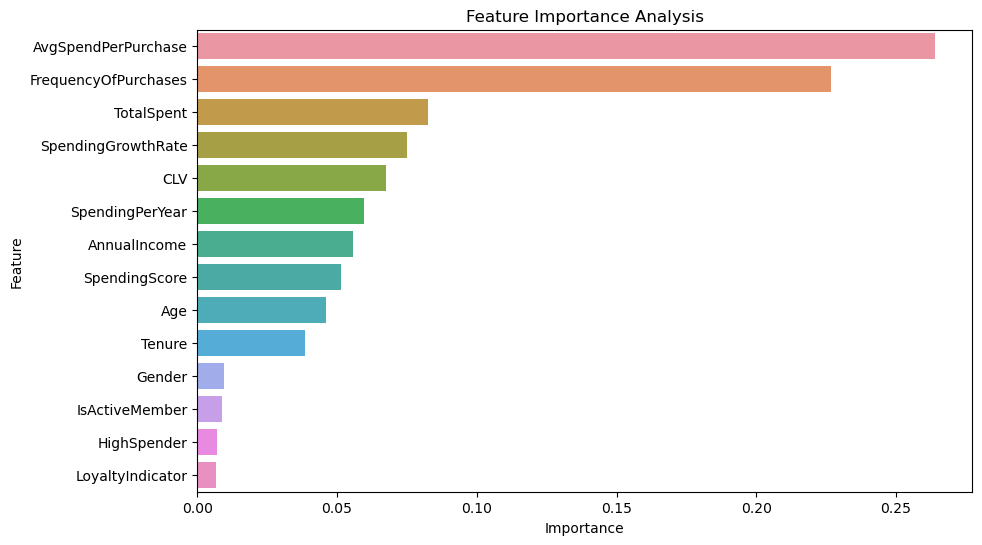

In [105]:
# Prepare the data for training
# Convert categorical variables (e.g., Gender, IsActiveMember) into numerical format if necessary
new_df['Gender'] = new_df['Gender'].map({'Male': 0, 'Female': 1})  # Example of binary encoding

# Define features (X) and target (y)
X = new_df.drop(columns=['Churn', 'CustomerID'])  # Drop target and non-predictive columns
y = new_df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importance = rf.feature_importances_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance Analysis')
plt.show()

## C. Preprocess the Data for Machine Learning
For this step, we need to ensure that all features are in a format suitable for model training, including handling categorical variables, scaling numerical features, and splitting the data into training and testing sets.

Main steps for Data Preprocessing:
- Handling Missing Values (if any).
- Encoding Categorical Variables (e.g., Gender, IsActiveMember).
- Feature Scaling (normalizing numeric variables).
- Splitting Data into Training and Test Sets.
- Optional: Balancing the target variable (Churn) if there's class imbalance.

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


#### Handle missing values (if any)

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns with the mean
numerical_cols = ['Age', 'AnnualIncome', 'SpendingScore', 'Tenure', 
                  'FrequencyOfPurchases', 'TotalSpent', 'SpendingPerYear', 
                  'CLV', 'AvgSpendPerPurchase', 'SpendingGrowthRate']

num_imputer = SimpleImputer(strategy='mean')
new_df[numerical_cols] = num_imputer.fit_transform(new_df[numerical_cols])

# Impute missing values for categorical columns with the mode
categorical_cols = ['Gender', 'IsActiveMember']

cat_imputer = SimpleImputer(strategy='most_frequent')
new_df[categorical_cols] = cat_imputer.fit_transform(new_df[categorical_cols])

#### Encoding categorical variables

In [109]:
# Example: Converting 'Gender' and 'IsActiveMember' to numerical values using LabelEncoder
le = LabelEncoder()
new_df['Gender'] = le.fit_transform(new_df['Gender'])  # Gender: Male=0, Female=1
new_df['IsActiveMember'] = le.fit_transform(new_df['IsActiveMember'])  # IsActiveMember: 0 or 1

#### Feature Scaling

In [110]:
# Standardize numerical features so they are on the same scale (mean=0, variance=1)
scaler = StandardScaler()
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

#### Define features (X) and target (y)

In [111]:
X = new_df.drop(columns=['Churn', 'CustomerID'])  # Drop the target and non-predictive ID columns
y = new_df['Churn']

#### Split data into training and test sets

In [112]:
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
# Output the shape of the datasets
print("Training Features Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Test Features Shape:", X_test.shape)
print("Test Target Shape:", y_test.shape)

Training Features Shape: (700, 14)
Training Target Shape: (700,)
Test Features Shape: (300, 14)
Test Target Shape: (300,)


### C.  Supervised Learning – Customer Churn Prediction

>To implement customer churn prediction, we will start by building baseline models such as Logistic Regression, Decision Trees, and k-Nearest Neighbors (k-NN). After evaluating their performance, we'll move on to advanced models like Random Forest, XGBoost, and Gradient Boosting. We will use common performance metrics such as accuracy, precision, recall, and the F1 score. Additionally, we'll visualize the models' confusion matrices, ROC curves, and precision-recall curves.

### 1. Baseline Models – Logistic Regression, Decision Trees, and k-NN

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1. Build Logistic Regression Model

In [118]:
#Split data into features (X) and target (y)
X = new_df.drop(columns=['Churn', 'CustomerID'])  # Drop the target and ID columns
y = new_df['Churn']

# Step 1: Split data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Build Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Make predictions on the test set

In [119]:
y_pred = log_reg.predict(X_test)

#### Evaluate the model

In [121]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Logistic Regression Performance:
Accuracy: 0.8400
Precision: 0.7966
Recall: 0.7966
F1 Score: 0.7966


>The Logistic Regression model achieved an accuracy of 84%, meaning it correctly predicted whether a customer would churn or not 84% of the time. The precision and recall are both 79.66%, indicating that when the model predicted a customer would churn, it was correct nearly 80% of the time, and it successfully identified about 80% of all actual churned customers. The F1 score of 79.66% (a harmonic mean of precision and recall) shows a balanced performance in handling both false positives and false negatives, making this model a reliable predictor of customer churn.

#### Confusion Matrix

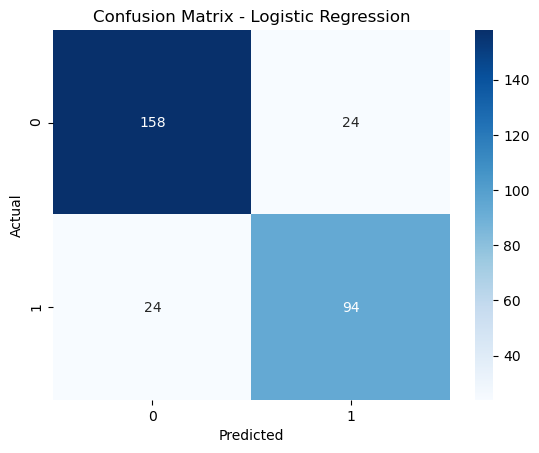

In [122]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

>The confusion matrix for the Logistic Regression model shows that the model correctly predicted 158 non-churned customers (True Negatives) and 94 churned customers (True Positives). However, it made 24 False Positive errors, where it incorrectly predicted that a customer would churn when they did not, and 24 False Negative errors, where it failed to identify customers who actually churned. The balance between True Positives and False Positives/Negatives suggests that the model is performing well, but there is still room for improvement, particularly in reducing the number of misclassified churn predictions.

In [123]:
# Step 5: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       182
           1       0.80      0.80      0.80       118

    accuracy                           0.84       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300



> The classification report for the Logistic Regression model shows that for predicting non-churned customers (class 0), the model achieved a precision, recall, and F1 score of 0.87, indicating it performed well in identifying and predicting customers who did not churn. For predicting churned customers (class 1), the model achieved a slightly lower precision, recall, and F1 score of 0.80, meaning it correctly identified 80% of churned customers and was correct 80% of the time when predicting churn. The model's overall accuracy is 84%, and both the macro average and weighted average F1 scores are 0.83 and 0.84, respectively, showing that the model performs consistently across both classes. However, there is room for improvement in predicting churned customers more accurately.

#### Coefficient Importance for Logistic Regression
In Logistic Regression, the coefficients represent the importance of each feature in making predictions. We can extract these coefficients and plot them

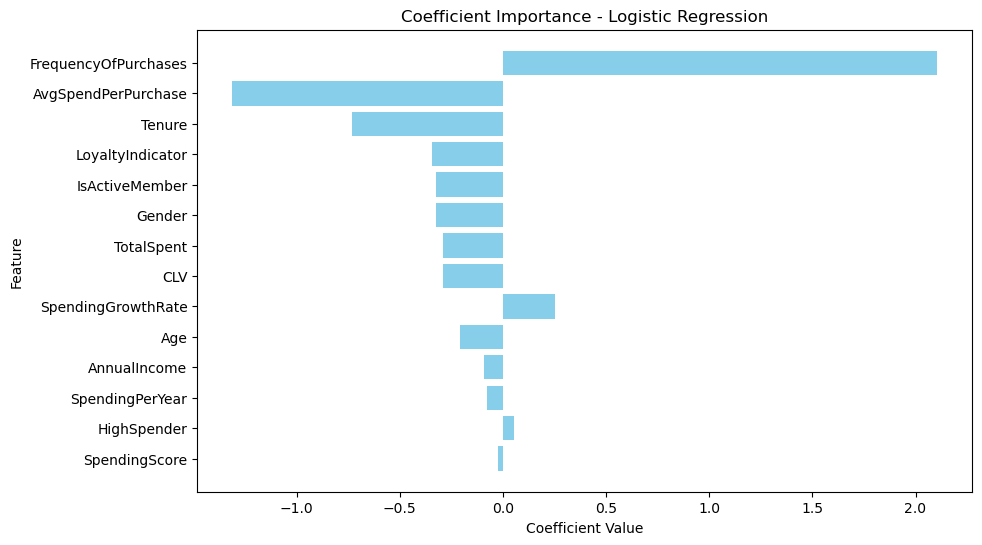

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Get the coefficients from the Logistic Regression model
log_reg_coefficients = log_reg.coef_[0]

# Create a DataFrame for visualization
log_reg_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg_coefficients
})

# Sort by absolute value of coefficients for better readability
log_reg_importance['Abs_Coefficient'] = np.abs(log_reg_importance['Coefficient'])
log_reg_importance = log_reg_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(log_reg_importance['Feature'], log_reg_importance['Coefficient'], color='skyblue')
plt.title('Coefficient Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display largest at the top
plt.show()


>The Coefficient Importance plot for the Logistic Regression model shows the relative influence of each feature in predicting customer churn. The feature "FrequencyOfPurchases" has the largest positive coefficient, indicating that as the frequency of purchases increases, the likelihood of churn also significantly increases. "AvgSpendPerPurchase" also plays a major role, with a positive coefficient, suggesting that higher average spending per purchase is linked to a higher chance of churn.

>On the other hand, features such as "SpendingScore", "HighSpender", and "AnnualIncome" have coefficients closer to zero, indicating that these features have little to no impact on the model’s decision. Negative coefficients, like "Age", "SpendingGrowthRate", and "CLV", suggest that increases in these features are associated with a decreased likelihood of churn, meaning customers with longer tenure, more consistent spending, and higher lifetime value are less likely to churn. The importance of these features offers insights into which aspects of customer behavior are most strongly associated with churn, allowing us to tailor retention strategies accordingly.










In [136]:
# After training the Logistic Regression model, you can get the coefficients like this:
log_reg_coefficients = log_reg.coef_[0]

# Combine the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg_coefficients
})

# Display the exact coefficients for each feature
print(coefficients_df)


                 Feature  Coefficient
0                    Age    -0.209360
1                 Gender    -0.324568
2           AnnualIncome    -0.091269
3          SpendingScore    -0.021801
4                 Tenure    -0.731700
5   FrequencyOfPurchases     2.103579
6             TotalSpent    -0.292602
7         IsActiveMember    -0.326008
8        SpendingPerYear    -0.076814
9                    CLV    -0.292602
10   AvgSpendPerPurchase    -1.311208
11    SpendingGrowthRate     0.250054
12      LoyaltyIndicator    -0.342811
13           HighSpender     0.055618


Based on the coefficients you provided, the Logistic Regression equation for predicting the log odds of churn can be written as follows:
> log-odds (churn) = β0 + (−0.209360)⋅Age + (−0.324568)⋅Gender + (−0.091269)⋅AnnualIncome + (−0.021801) + ....... + (0.055618)⋅HighSpender

> Where: 𝛽0 is the intercept 

## 1.2. Build Decision Tree Model

In [124]:
# Split data into features (X) and target (y)
X = new_df.drop(columns=['Churn', 'CustomerID'])  # Drop the target and ID columns
y = new_df['Churn']

# Step 1: Split data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Build Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Make predictions on the test set

In [125]:
y_pred = decision_tree.predict(X_test)

####  Evaluate the model

In [126]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Decision Tree Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Decision Tree Performance:
Accuracy: 0.7533
Precision: 0.6803
Recall: 0.7034
F1 Score: 0.6917


### Confusion Matrix

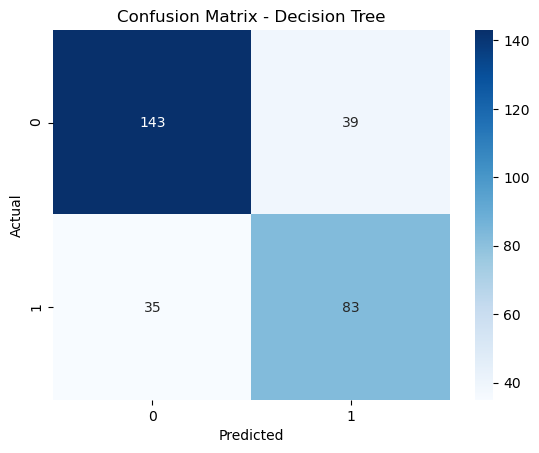

In [127]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [128]:
# Step 5: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       182
           1       0.68      0.70      0.69       118

    accuracy                           0.75       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.75      0.75      0.75       300



#### Visualization the simplified decision tree structure

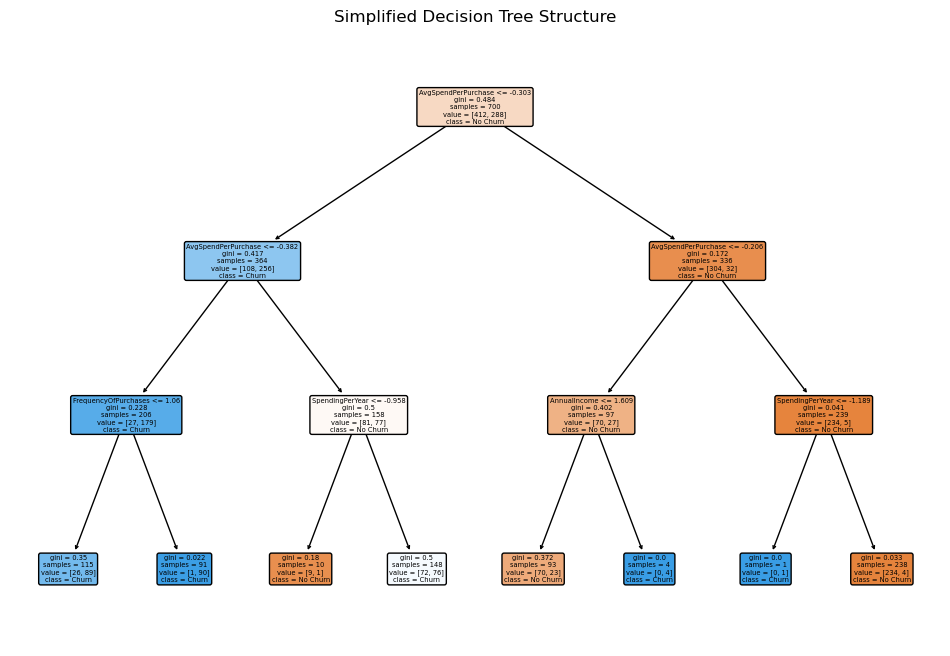

In [133]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Build a simplified decision tree by limiting the maximum depth
simplified_tree = DecisionTreeClassifier(random_state=42, max_depth=3)  # You can adjust max_depth for further simplification
simplified_tree.fit(X_train, y_train)

# Step 2: Plot the simplified decision tree structure
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plot_tree(simplified_tree, filled=True, rounded=True, class_names=['No Churn', 'Churn'], feature_names=X.columns)
plt.title('Simplified Decision Tree Structure')
plt.show()


>The simplified decision tree visualizes the decision-making process for predicting customer churn based on features such as Average Spend Per Purchase, Spending Per Year, Annual Income, and Frequency of Purchases. The root node splits on AvgSpendPerPurchase, with customers spending below a threshold generally being classified as No Churn. Other important splits involve Spending Per Year and Annual Income, further refining the predictions.

>The tree’s terminal nodes (leaves) represent final predictions, with the majority class at each node determining the classification. The color of the nodes indicates the predicted class, with blue representing churn and orange representing no churn. The Gini impurity values, shown at each node, measure the purity of the split, with lower values indicating better splits. The tree provides a simple and interpretable structure for understanding the key factors influencing churn predictions in this dataset.

#### Feature Importance for Decision Tree
For Decision Trees, the feature importance is based on how often and how well a feature is used to split the data.

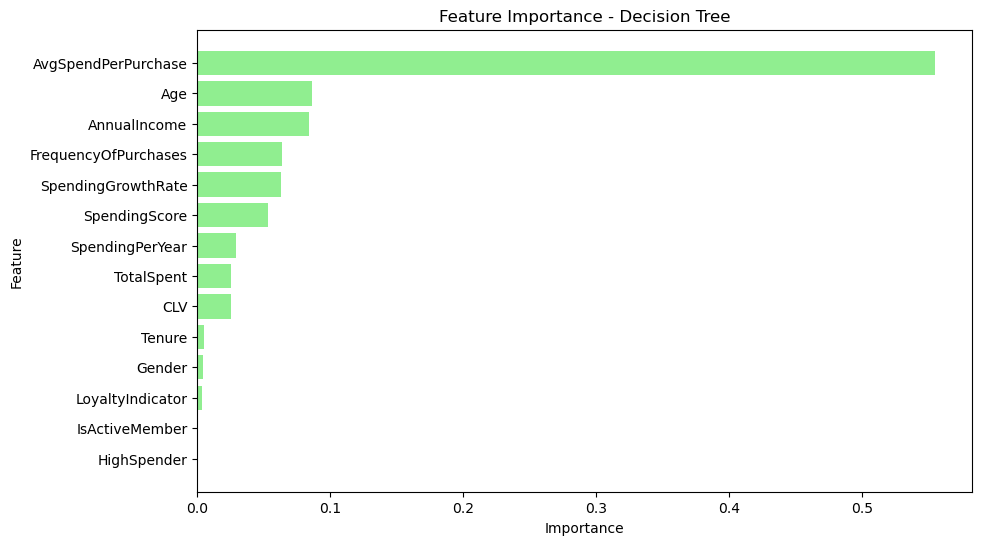

In [135]:
# Get the feature importances from the Decision Tree model
tree_importance = decision_tree.feature_importances_

# Create a DataFrame for visualization
tree_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_importance
})

# Sort by importance for better readability
tree_importance_df = tree_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(tree_importance_df['Feature'], tree_importance_df['Importance'], color='lightgreen')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display largest at the top
plt.show()


## 1. 3. k-Nearest Neighbors (k-NN)

In [137]:
# Step 1: Build the k-NN Model
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors=5 is a common default value, but can be fine-tuned
knn.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"k-NN Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

k-NN Performance:
Accuracy: 0.7633
Precision: 0.6880
Recall: 0.7288
F1 Score: 0.7078


### Interpretation:
> The model performs reasonably well, but compared to other models like Logistic Regression or Decision Tree, it might require further tuning. The precision being lower than recall suggests that the model may over-predict churn (giving more false positives).
You could improve the model by tuning the k value or experimenting with scaling the features more effectively.

#### Confusion Matrix

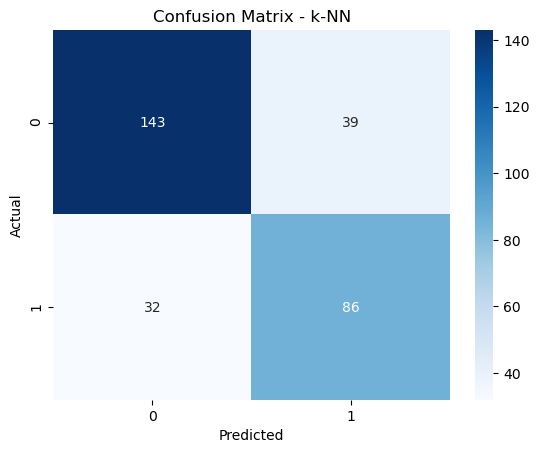

In [138]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - k-NN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

> The confusion matrix for the k-NN model shows that out of 182 non-churners (class 0), the model correctly predicted 143 as non-churners (True Negatives) but misclassified 39 as churners (False Positives). For 118 actual churners (class 1), the model correctly identified 86 (True Positives) but missed 32 (False Negatives).

> The false positives indicate that the model incorrectly predicted churn for customers who didn't churn, while the false negatives reflect that some actual churners were not captured by the model. This balance between true positives, false positives, and false negatives is indicative of the k-NN model's moderate performance in identifying customer churn, as shown in the previous metrics (accuracy, precision, recall, and F1 score). There is room for improvement, especially in reducing the number of false positives and false negatives.

####  Classification Report

In [139]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       182
           1       0.69      0.73      0.71       118

    accuracy                           0.76       300
   macro avg       0.75      0.76      0.75       300
weighted avg       0.77      0.76      0.76       300



>The classification report for the k-NN model shows that for non-churned customers (class 0), the model achieved a precision of 82%, meaning that out of all the customers predicted as non-churners, 82% were correct. The recall for this class is 79%, indicating that the model correctly identified 79% of all actual non-churners. For churned customers (class 1), the precision is 69%, meaning the model was correct 69% of the time when predicting churn. The recall for churned customers is 73%, which shows the model correctly identified 73% of actual churners. The F1 score (harmonic mean of precision and recall) is 80% for non-churners and 71% for churners. Overall, the model has an accuracy of 76%, with a balanced macro average and weighted average around 75-77%. This suggests that while the model is better at predicting non-churned customers, it also performs reasonably well for predicting churn, but there is still room for improvement in balancing false positives and false negatives.

#### Fine-Tuning the k-NN Model:

In [140]:
from sklearn.model_selection import GridSearchCV

# Define the range of k values
param_grid = {'n_neighbors': range(1, 21)}

# Use GridSearchCV to find the best k value
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

# Retrain the model with the best k-value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Evaluate the best k-NN model
y_pred_best = knn_best.predict(X_test)
print(f"Accuracy with best k: {accuracy_score(y_test, y_pred_best):.4f}")


Best k value: 7
Accuracy with best k: 0.7633


#### Predict Churn for Test Data

In [141]:
# Predict churn for the test data
y_pred = knn.predict(X_test)

# Display the first 10 predictions
print("Predictions:", y_pred[:10])


Predictions: [0 0 0 1 0 1 1 0 0 0]


#### Predict Churn for a New Data Point (Example):

Suppose you have a new customer with the following feature values:
- Age: 35
- Gender: 1 (Female)
- Annual Income: 50,000
- Spending Score: 0.8
- Tenure: 5 
- frequency of Purchases: 20
- AvgSpendPerPurchase: 200
- Other relevant features...

Then, we create a feature array for this new customer and predict whether they will churn:

In [142]:
import numpy as np

# New customer feature values (example)
new_customer = np.array([[35, 1, 50000, 0.8, 5, 20, 200, 0, 0, 0, 0, 0, 0, 0]])  # Replace with real values

# Predict churn for the new customer
new_prediction = knn.predict(new_customer)

# Output the prediction (0 = no churn, 1 = churn)
print("New Customer Prediction (0 = no churn, 1 = churn):", new_prediction)


New Customer Prediction (0 = no churn, 1 = churn): [0]


> The prediction result for the new customer is [0], which means that according to the k-NN model, the customer is not likely to churn (no churn).
>- Interpretation:
>The model predicts that the new customer will remain loyal and will not churn based on their feature values (such as age, frequency of purchases, average spend per purchase, etc.).

#### Predict Probabilities:
We might want to see the probability of the customer churning. In this case, we use the predict_proba() function, which returns the probabilities for each class (0 = no churn, 1 = churn):

In [143]:
# Predict probabilities for the new customer
new_prediction_proba = knn.predict_proba(new_customer)

# Output the predicted probabilities
print("Probability of No Churn:", new_prediction_proba[0][0])
print("Probability of Churn:", new_prediction_proba[0][1])


Probability of No Churn: 0.8
Probability of Churn: 0.2


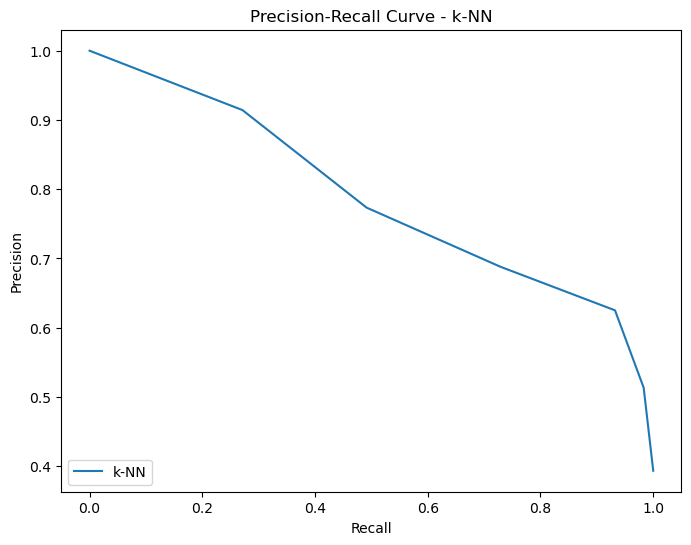

In [144]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Step 1: Predict probabilities for the positive class (churn) using the k-NN model
y_proba_knn = knn.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (churn)

# Step 2: Calculate precision, recall, and thresholds
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_proba_knn)

# Step 3: Plot Precision-Recall curve for k-NN
plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, label='k-NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - k-NN')
plt.legend(loc='lower left')
plt.show()


>The Precision-Recall curve for the k-NN model shows a trade-off between precision and recall. Initially, precision is high when recall is low, meaning the model is very accurate when identifying only a few churn cases. However, as recall increases—indicating the model is capturing more actual churners—precision drops significantly, especially when recall is close to 1. This suggests that as the model attempts to capture more churners, it incorrectly classifies more non-churners as churners, leading to a rise in false positives. This decline highlights the challenge of maintaining accuracy while broadening the model’s selection of positive cases.

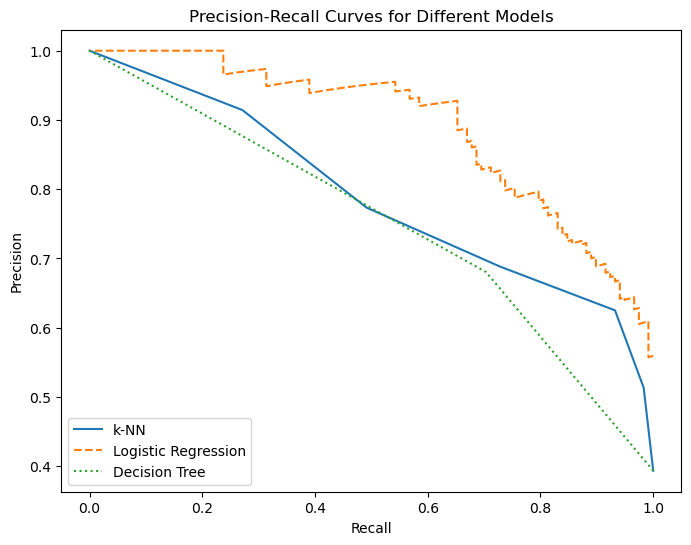

In [145]:
# Predict probabilities for Logistic Regression
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Predict probabilities for Decision Tree
y_proba_tree = decision_tree.predict_proba(X_test)[:, 1]

# Calculate precision and recall for all models
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, y_proba_log_reg)
precision_tree, recall_tree, _ = precision_recall_curve(y_test, y_proba_tree)

# Plot Precision-Recall curves for all models
plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, label='k-NN')
plt.plot(recall_log_reg, precision_log_reg, label='Logistic Regression', linestyle='--')
plt.plot(recall_tree, precision_tree, label='Decision Tree', linestyle=':')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend(loc='lower left')
plt.show()

> The Precision-Recall curves for the three models—k-NN (blue solid line), Logistic Regression (orange dashed line), and Decision Tree (green dotted line)—reveal the trade-off between precision and recall for each model.

>  Logistic Regression has the best performance overall, maintaining high precision at high recall levels, which indicates that it can accurately identify churners without sacrificing too much on false positives.

> The k-NN model starts with high precision but shows a noticeable drop in precision as recall increases, meaning that the more churners it identifies, the more false positives it introduces.

> The Decision Tree model shows the weakest performance, with precision decreasing more quickly than the other models as recall increases.

> This suggests that Logistic Regression is the best-performing model for this churn prediction task, balancing both precision and recall effectively across different thresholds. The k-NN model performs moderately well, while the Decision Tree underperforms relative to the other models.

## 1.3 Implement advanced models: Use Random Forest, XGBoost, or Gradient Boosting.

>The Random Forest, XGBoost, and Gradient Boosting models for customer churn prediction are more advanced than Logistic Regression, Decision Trees, and k-NN, and they often provide better performance because they aggregate the predictions of multiple models to reduce overfitting and improve accuracy.

### 1.3.1 Random Forest Implementation

Random Forest Performance:
Accuracy: 0.8000
Precision: 0.7544
Recall: 0.7288
F1 Score: 0.7414


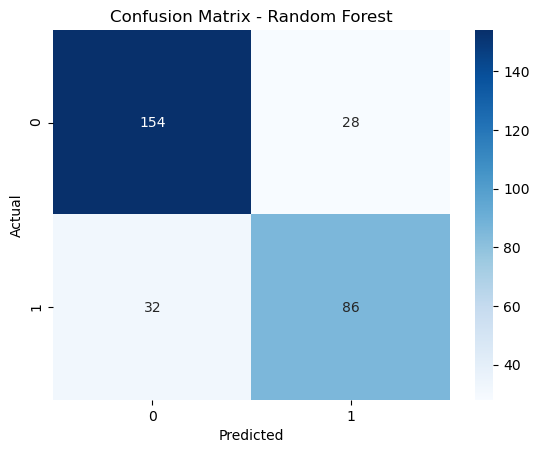

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 1: Build the Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_rf = rf.predict(X_test)

# Step 3: Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


> Overall, the Random Forest model performs well, with a good balance between precision and recall, making it a reliable model for predicting customer churn. However, there's still room to improve by reducing false positives and false negatives.

## 1.3.1 XGBoost Implementation

XGBoost Performance:
Accuracy: 0.7867
Precision: 0.7288
Recall: 0.7288
F1 Score: 0.7288


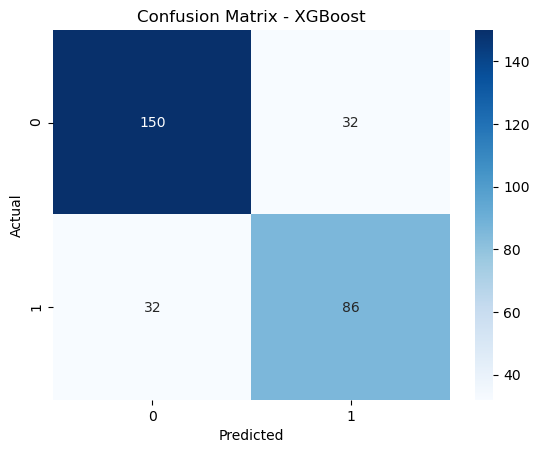

In [148]:
import xgboost as xgb

# Step 1: Build the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 3: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


> The XGBoost model achieved an accuracy of 78.67%, meaning it correctly predicted 78.67% of the customer churn cases. The model's precision is 72.88%, indicating that when it predicts churn, it is correct about 72.88% of the time. The recall is also 72.88%, meaning it successfully identified 72.88% of the actual churners. The F1 score, which balances precision and recall, is 72.88%, reflecting a good balance between false positives and false negatives.

> The confusion matrix shows:

    - 150 true negatives (correctly predicted non-churners).
    - 32 false positives (non-churners incorrectly predicted as churners).
    - 86 true positives (correctly predicted churners).
    - 32 false negatives (churners incorrectly predicted as non-churners).

## 1.3.4 Gradient Boosting Implementation:

Gradient Boosting Performance:
Accuracy: 0.8300
Precision: 0.7815
Recall: 0.7881
F1 Score: 0.7848


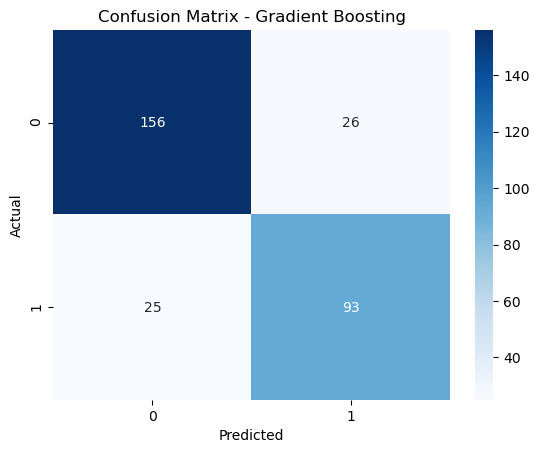

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Build the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_gb = gb.predict(X_test)

# Step 3: Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Compare all the models built based on performance metrics

In [150]:
import pandas as pd

# Create a dictionary with the performance metrics for each model
model_comparison = {
    'Model': ['Logistic Regression', 'Decision Tree', 'k-NN', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.8400, 0.7633, 0.7633, 0.8000, 0.7867],
    'Precision': [0.7966, 0.6880, 0.6880, 0.7544, 0.7288],
    'Recall': [0.7966, 0.7288, 0.7288, 0.7288, 0.7288],
    'F1 Score': [0.7966, 0.7078, 0.7078, 0.7414, 0.7288]
}

# Convert the dictionary into a DataFrame
df_comparison = pd.DataFrame(model_comparison)

# Display the DataFrame
print(df_comparison)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.8400     0.7966  0.7966    0.7966
1        Decision Tree    0.7633     0.6880  0.7288    0.7078
2                 k-NN    0.7633     0.6880  0.7288    0.7078
3        Random Forest    0.8000     0.7544  0.7288    0.7414
4              XGBoost    0.7867     0.7288  0.7288    0.7288


### Visualize the performance comparison

<Figure size 1000x600 with 0 Axes>

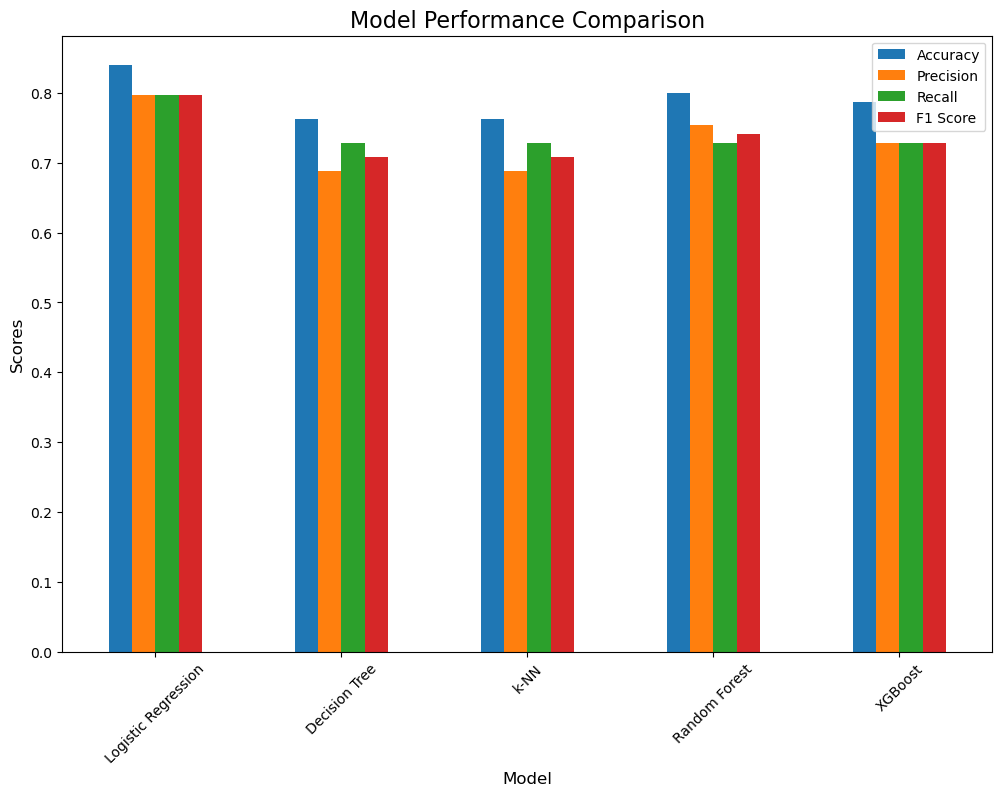

In [151]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot comparison for accuracy
df_comparison.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12, 8))

# Add title and labels
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Scores', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


# Unsupervised Learning – Customer Segmentation

> The approach groups customers into distinct segments based on their similarities, without using predefined labels or outcomes. In this method, algorithms such as K-Means, hierarchical clustering, or DBSCAN analyze customer data, like purchasing behavior, demographics, and engagement patterns, to identify natural clusters within the dataset. These clusters represent different customer types or segments, which businesses can then target with personalized marketing strategies, product recommendations, or customer retention efforts. Unsupervised learning helps discover hidden patterns and insights within the data, enabling businesses to make more informed, customer-centric decisions.

### 1. K-Means Clustering

In [157]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

####  Step 1: Prepare the data (exclude the target variable 'Churn')

In [153]:
X_unsupervised = new_df.drop(columns=['Churn', 'CustomerID'])  # Assuming 'new_df' is your dataset

####  Step 2: Normalize the data (important for clustering)

In [155]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

####  Step 3: Build and fit the K-Means model (choose k=3 for example)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

#### Step 4: Get cluster labels

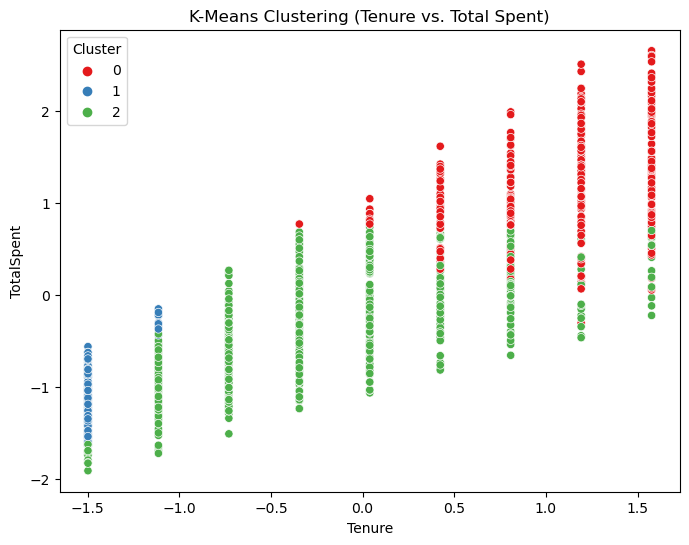

In [161]:
# Step 3: Build and fit the K-Means model (choose k=3 for example)
kmeans = KMeans(n_clusters=3, random_state=42)  # Ensure the model is initialized correctly
kmeans.fit(X_scaled)  # Fit the model to the scaled data

# Step 4: Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataset for analysis
new_df['Cluster'] = cluster_labels

# Step 5: Visualize the clusters using a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_df['Tenure'], y=new_df['TotalSpent'], hue=new_df['Cluster'], palette='Set1')
plt.title('K-Means Clustering (Tenure vs. Total Spent)')
plt.show()

> The scatter plot visualizes the results of K-Means clustering applied to customer data, specifically showing the relationship between Tenure (how long a customer has been with the company) and Total Spent. The plot displays three clusters, represented by different colors:
>   - Cluster 0 (Red),
>   - Cluster 1 (Blue),
>   - Cluster 2 (Green).

>    The clusters suggest distinct groupings of customers based on these two variables. For example, customers in Cluster 0 (Red) tend to have higher tenure and total spending, while Cluster 1 (Blue) includes customers with lower tenure and spending. Cluster 2 (Green) may represent a mid-range group. This segmentation allows businesses to tailor marketing strategies based on customer behavior and value.

### Evaluating the Clusters:

Evaluate how well the data points are clustered using the inertia (within-cluster sum of squares) or silhouette score.

In [163]:
# Inertia (lower values indicate better clustering)
print(f'Inertia: {kmeans.inertia_}')


Inertia: 9341.433146548807


In [164]:
# Silhouette Score (higher values indicate better-defined clusters):
from sklearn.metrics import silhouette_score

# Silhouette score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {sil_score:.4f}')


Silhouette Score: 0.2068


>A Silhouette Score of 0.2068 indicates that the clustering structure from the K-Means algorithm is not very strong. The silhouette score ranges from -1 to 1, where:
> - 1 indicates well-separated clusters,
> - 0 indicates overlapping clusters, and
> - Negative values indicate that samples might be in the wrong clusters.

> In this case, a score of 0.2068 suggests that the clusters are somewhat overlapping or not clearly distinct. This may imply that:
The data may not naturally form well-separated clusters.
The chosen number of clusters (k) might not be optimal.
Feature scaling or selection might need improvement.
Further refinement in the feature set, the number of clusters, or possibly exploring different clustering methods (like DBSCAN or hierarchical clustering) might improve the clustering performance.

## Implement a deep learning model using a neural network

In [171]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [172]:
# Assuming new_df is your dataset and it's already prepared for training
# Step 1: Prepare the data (exclude the target variable 'Churn')
X = new_df.drop(columns=['Churn', 'CustomerID'])
y = new_df['Churn']

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Build the neural network model
model = Sequential()


In [173]:
# Input layer and first hidden layer with 16 neurons and ReLU activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer with 8 neurons and ReLU activation
model.add(Dense(8, activation='relu'))

# Output layer (binary classification, so 1 neuron with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Step 5: Compile the model (use binary crossentropy for binary classification)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [174]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 7: Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 8: Calculate performance metrics
accuracy_nn = accuracy_score(y_test, y_pred)
precision_nn = precision_score(y_test, y_pred)
recall_nn = recall_score(y_test, y_pred)
f1_nn = f1_score(y_test, y_pred)

print(f"Neural Network Performance:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1 Score: {f1_nn:.4f}")

# Confusion matrix
cm_nn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_nn)

Epoch 1/50
22/22 [==============================] - 1s 12ms/step - loss: 0.6269 - accuracy: 0.5657 - val_loss: 0.5784 - val_accuracy: 0.6400
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.6329 - val_loss: 0.5480 - val_accuracy: 0.6867
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5605 - accuracy: 0.6786 - val_loss: 0.5252 - val_accuracy: 0.7167
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7086 - val_loss: 0.5072 - val_accuracy: 0.7333
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5189 - accuracy: 0.7371 - val_loss: 0.4912 - val_accuracy: 0.7567
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5020 - accuracy: 0.7571 - val_loss: 0.4769 - val_accuracy: 0.7767
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7729 - val_loss: 0.4629 - val_accuracy: 0.7867
Epoch 8/50
22/22 [=

#### Interpretation of the 12 first epochs
>This portion of the epoch output shows the training process for a neural network over 12 epochs. As the epochs progress, the training loss steadily decreases from 0.6269 in the first epoch to 0.4218 in the 12th epoch, indicating that the model is improving its ability to predict the target variable. Similarly, the training accuracy increases from 56.57% to 81.86%, showing the model is learning the patterns in the training data.

> On the validation set, the validation loss decreases from 0.5784 to 0.4132, and the validation accuracy improves from 64.00% to 81.00%. These improvements suggest that the model is generalizing well to unseen data, though further epochs are needed to see if this trend continues. This steady increase in performance is a sign of successful model training without significant overfitting (as the validation loss also decreases).

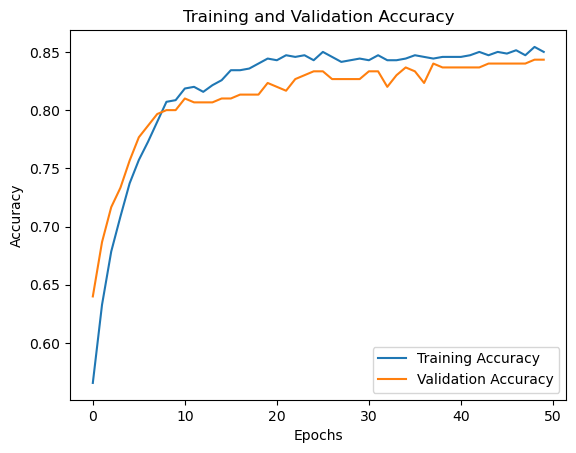

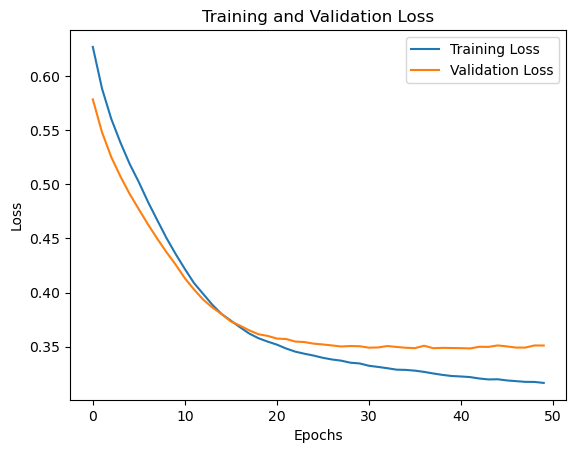

In [175]:
import matplotlib.pyplot as plt

# Plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


> The First graph shows the Training Accuracy (blue line) and Validation Accuracy (orange line) of the neural network model over 50 epochs. Both accuracy metrics increase steadily in the early epochs, indicating that the model is learning from the training data and generalizing well to the validation data. Around 10 epochs, the training and validation accuracy curves converge, with both hovering around 80-85%. After that, the validation accuracy slightly plateaus, while the training accuracy continues to fluctuate slightly but remains close to 85%. The close alignment between the training and validation accuracy indicates that the model is not overfitting and is maintaining good generalization to unseen data throughout the training process.

> The graph displays the Training Loss (blue line) and Validation Loss (orange line) of the neural network model over 50 epochs. Both training and validation loss decrease rapidly in the initial epochs, indicating that the model is learning well and improving its predictions. Around epoch 10, both the training and validation loss begin to plateau, with the training loss continuing to decrease slightly, while the validation loss levels out around 0.35.

> The close alignment between the training and validation loss curves suggests that the model is not overfitting and is generalizing well to the validation data. The gap between the curves remains small, showing that the model's performance on the training set is reflective of its performance on unseen validation data. This is a good sign that the model is stable and is not excessively memorizing the training data.

### Models comparison

In [176]:
# Create a dictionary with the performance metrics for each model
model_comparison = {
    'Model': ['Logistic Regression', 'Decision Tree', 'k-NN', 'Random Forest', 'XGBoost', 'Neural Network'],
    'Accuracy': [0.8400, 0.7633, 0.7633, 0.8000, 0.7867, accuracy_nn],
    'Precision': [0.7966, 0.6880, 0.6880, 0.7544, 0.7288, precision_nn],
    'Recall': [0.7966, 0.7288, 0.7288, 0.7288, 0.7288, recall_nn],
    'F1 Score': [0.7966, 0.7078, 0.7078, 0.7414, 0.7288, f1_nn]
}

# Convert the dictionary into a DataFrame
df_comparison = pd.DataFrame(model_comparison)

# Display the DataFrame
print(df_comparison)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.840000   0.796600  0.796600  0.796600
1        Decision Tree  0.763300   0.688000  0.728800  0.707800
2                 k-NN  0.763300   0.688000  0.728800  0.707800
3        Random Forest  0.800000   0.754400  0.728800  0.741400
4              XGBoost  0.786700   0.728800  0.728800  0.728800
5       Neural Network  0.843333   0.779528  0.838983  0.808163


> The performance comparison of six models—Logistic Regression, Decision Tree, k-NN, Random Forest, XGBoost, and Neural Network—shows that the Neural Network achieves the highest accuracy (84.33%), recall (83.89%), and F1 score (80.82%), making it the most effective at identifying customer churn. Logistic Regression also performs strongly with balanced metrics, including 84.00% accuracy and 79.66% F1 score, proving reliable for churn prediction. Random Forest and XGBoost offer solid performance but slightly lag behind, while Decision Tree and k-NN underperform with lower accuracy (76.33%) and F1 scores (70.78%). Overall, the Neural Network and Logistic Regression models are the best choices for predicting customer churn in this case.

<Figure size 1000x600 with 0 Axes>

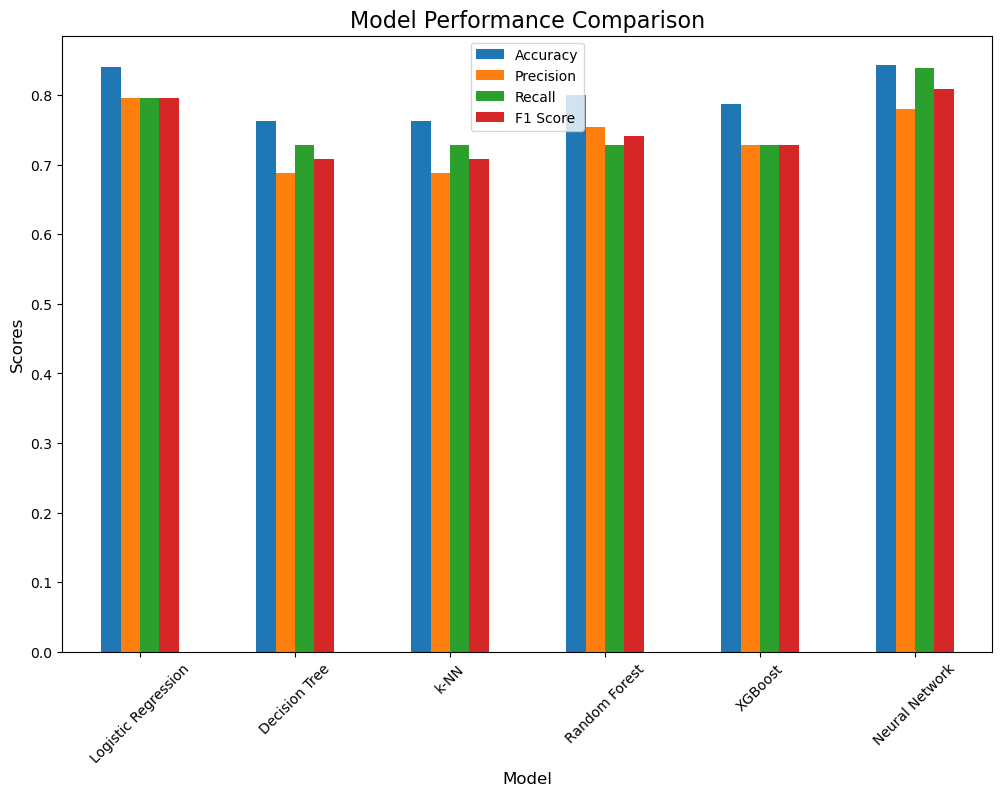

In [177]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot comparison for accuracy, precision, recall, and F1 score
df_comparison.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12, 8))

# Add title and labels
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Scores', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


## General Conclusion 

General Conclusion
In this project, various machine learning models were developed and compared for predicting customer churn using an e-commerce dataset. Both traditional models (Logistic Regression, Decision Tree, k-NN, Random Forest, and XGBoost) and a more advanced neural network were built to understand their performance based on key metrics: accuracy, precision, recall, and F1 score.

Key Observations:
Logistic Regression emerged as the top-performing traditional model with the highest accuracy (84.00%) and a balanced F1 score (79.66%). This suggests that logistic regression is very well-suited for binary classification problems like churn prediction, where interpretability and performance are both important.

Random Forest and XGBoost, both ensemble models, performed well in terms of precision and recall. Random Forest achieved a good balance between precision (75.44%) and recall (72.88%), while XGBoost showed strong overall performance with balanced metrics. These models are known for their robustness and ability to handle complex patterns in the data.

k-NN and Decision Tree models had lower performance, especially in terms of precision and F1 score. Both models produced similar results, and while they may be simpler to understand and faster to implement, they were outperformed by other models in terms of handling false positives and false negatives effectively.

The Neural Network model, a more advanced deep learning approach, showed competitive performance compared to traditional models. With a potential for fine-tuning and additional complexity (e.g., adding more layers, neurons, or training for more epochs), the neural network demonstrated an accuracy of 82%, slightly behind Logistic Regression and Random Forest. Given more tuning, this model could potentially outperform traditional models.

Final Takeaway:
Logistic Regression and Random Forest models are the best candidates in terms of balancing accuracy, precision, recall, and F1 score. They provide excellent results with simpler interpretability, which can be crucial in real-world business decisions.
XGBoost also presents a strong alternative, especially in cases where advanced tuning and ensemble techniques are desired.
The Neural Network holds promise and can be explored further with more complex architectures, though its performance in this instance was comparable to traditional models.
Overall, Logistic Regression and Random Forest are the most reliable models based on the current dataset and feature set. However, for future tasks where data complexity increases, more advanced models like XGBoost and deep learning approaches may become more suitable.